# subplot
## common method
```python
fig, ax = plt.subplots(x,y,...)
fig.suptitle(title)
fig.subplots_adjust(left, right, top, bottom, wspace, hspace)
ax = ax[x,y]
```
## first method
> use subplot
```python
fig = plt.figure(...)
fig.subplots_adjust(left, right, top, bottom, hspace, wspace)
fig.suptitle(title)
ax = plt.subplot(x,y,pos)
```
## second method
> use subplot <br>
> use gridspec
```python
from matplotlib import gridspec
fig = plt.figure(...)
fig.suptitle(title)
gs = gridspec(x,y)
gs.update(left, right, top, bottom, hspace, wspace)

ax = plt.subplot(gc[x,y])
```
## third method
> use subplot2grid
```python
fig = plt.figure(...)
fig.suptitle(title)
fig.subplots_adjust(left, right, top, bottom, wspace, hspace)
ax = plt.subplot2grid((x,y),(start_x,start_y),colspan=,rowspan=)
```

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

def make_ticklabel_invisible(fig):
    '''
    function
    ------------
    1. hide tick labels
    2. enumerate each ax by its name
    params
    ------------
    @fig
        corresponding plt.figure object
    '''
    for idx,ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%s"%(idx+1), ha="center", va="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

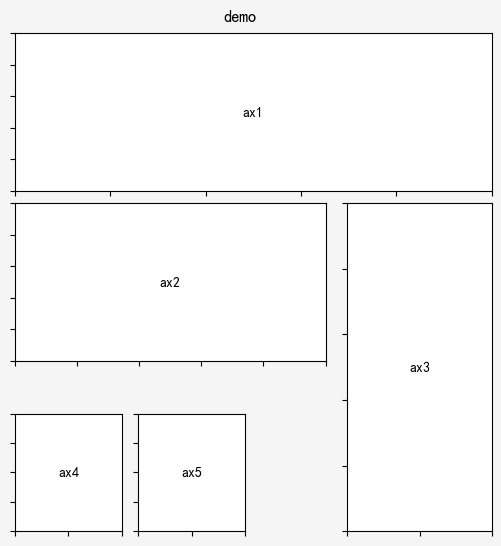

In [2]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.sans-serif"] = "SimHei"

fig = plt.figure(figsize=(6,6),
                facecolor="whitesmoke",
                edgecolor="gray")
fig.suptitle("demo")
fig.subplots_adjust(top=0.94,right=0.92,wspace=0.15,hspace=0.08)

ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax4 = plt.subplot2grid((4,4),(3,0))
ax5 = plt.subplot2grid((4,4),(3,1))

make_ticklabel_invisible(fig)

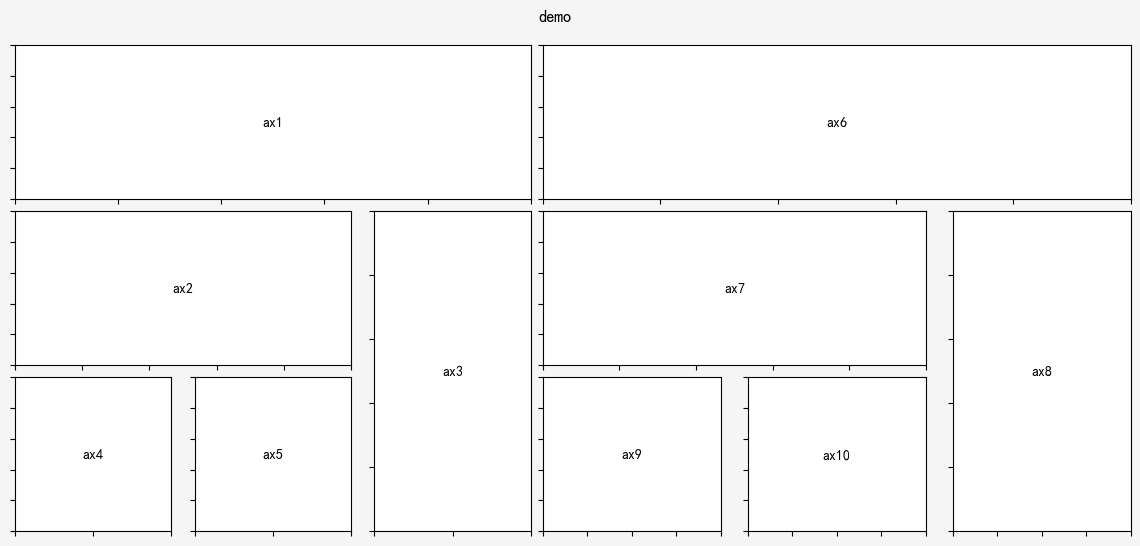

In [3]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import numpy as np

%matplotlib inline
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

fig = plt.figure(figsize=(12,6),
                facecolor="whitesmoke",
                edgecolor="gray")
fig.suptitle("demo")
gc1 = gridspec.GridSpec(3,3)
gc1.update(left=0.05, right=0.48,top=0.92,wspace=0.15,hspace=0.08)
ax1 = plt.subplot(gc1[0,:])
ax2 = plt.subplot(gc1[1,:-1])
ax3 = plt.subplot(gc1[1:,-1])
ax4 = plt.subplot(gc1[2,0])
ax5 = plt.subplot(gc1[2,1])

gc2 = gridspec.GridSpec(3,3)
gc2.update(left=0.49,right=0.98,top=0.92,wspace=0.15,hspace=0.08)
ax21 = plt.subplot(gc2[0,:])
ax22 = plt.subplot(gc2[1,:-1])
ax23 = plt.subplot(gc2[1:,-1])
ax24 = plt.subplot(gc2[2,0])
ax25 = plt.subplot(gc2[2,1])

make_ticklabel_invisible(fig)

# colorbars
1. patch for matplotlib <font color=vermillion><b>mpl_toolkits</b></font> provides multiple functions to manipulate matplotlib pyplot itmes
2. the hierachical form of plt image is:
    > image - background canvas<br>
    > axes - small patches divided from overall canvas<br>
    > figure - collections space of shapes and lines<br>
    > items - lines, shapes, legends, grids, ticks, ticklabels etc
    
<hr>


## colorbar in axes

In [4]:
import copy
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import axes_grid1

### patches and shapes
1. shapes and some arrows are stored in matplotlib.patches packages
2. and axes object aggregate one patches collection, just as figure object.
3. rectangle is one type of all patches collection

In [22]:
def add_box(ax):
    axpos = ax.get_position()
    rect = mpl.patches.Rectangle(
    (axpos.x0, axpos.y0), axpos.width, axpos.height,
        lw=3, ls='--', ec='r', fc='none', alpha=0.5
    )
    ax.patches.append(rect)

### axes & create axes on-the-fly
1. each axes is build by matplotlib.transforms.Bbox object
2. the structure of Bbox instance is <font color=burgendy><b>[[xmin,ymin],[xmax,ymax]]</b></font> or simply <font color=burgendy><b>[xmin,ymin,width,height]</b></font>, note that <font color=burgendy><b>[xmin,ymin]</b></font> is of the <font color=burgendy><b>bottom-left</b></font> place of bbox, and thus <font color=burgendy><b>[xmax,ymax]</b></font> is of the <font color=burgendy><b>top-right</b></font> place of bbox.
3. in order to construct new axes on-the-fly, we could first construct one Bbox , then use figure.add_axes(bbox) to incorporate this newly generated axes into current assigned figure
4. note that since under each axes lies one bbox object, axes object provides one get_position function, which will return <font color=burgendy><b>[[xmin,ymin],[xmax,ymax]]</b></font> of current assigned axes.
```python
axpos = ax.get_position()
caxpos = mpl.transforms.Bbox.from_extends(xmin,ymin,xmax,ymax)
cax = ax.figure.add_axes(caxpos)
```

In [18]:
def add_right_cax(ax, pad, width):
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)
    
    return cax

### colorbar & create colorbar on-the-fly
1. matplotlib.pyplot.colorbar will draw colorbar based on current pyplot image, which will use the  <font color=burgendy><b>norm</b></font> parameter extracted and generated from current image
2. if figure object is used to call colorbar function instead of directly call plt.colorbar,  <font color=burgendy><b>im</b></font> parameter should be specified, for the reason that plt.colorbar will automatically linked to current image, which is realized by  <font color=burgendy><b>plt.gca()</b></font> 
2. three important parameters in colorbar, and other less important parameters
    > a. im = matplotlib.cm.ScalarMappable(norm, cmap) relation between color range and colorbar legends. <font color=burgendy><b>norm: matplotlib.colors.Normalizevmin,vmax)|LogNorm(vmin,vmax)</b></font> <br>
    > b. cax | ax - place where colorbar would be located<br>
    > c. cmap - color map, which stands for coloring patterns. <font color=burgendy><b>matplotlib.cm.[Name]</b></font> <br>
    > d. orientation | extends | ticks | label

### create color bar using exterior norm
1. mpl.colors.Normalize(vmax, vmin)

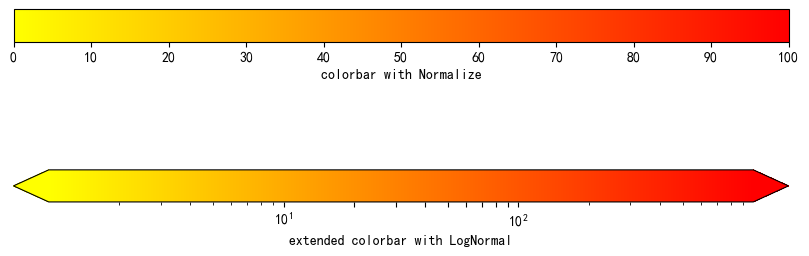

In [7]:
import copy
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

fig, ax = plt.subplots(2,1, figsize=(10,2.5))
fig.subplots_adjust(hspace=4)

cmap1 = copy.copy(mpl.cm.autumn_r)
norm1 = mpl.colors.Normalize(vmin=0, vmax=100)
im1 = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = fig.colorbar(im1, cax=ax[0], orientation="horizontal",
                     ticks=np.linspace(0,100,11),
                     label='colorbar with Normalize')

cmap2 = copy.copy(mpl.cm.autumn_r)
cmap2.set_under("yellow")
cmap2.set_over("red")
norm2 = mpl.colors.LogNorm(vmin=1E0, vmax=1E3)
im2 = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap2)
cbar2 = fig.colorbar(im2, cax=ax[1], orientation="horizontal",
                    extend="both",ticks=np.linspace(0,100,11),
                    label="extended colorbar with LogNormal")

### create colorbar using image related norm

In [8]:
def test_data():
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x,y)
    Z = np.exp(-np.power(-X,2)) + np.exp(-np.power(-Y,2))
    # normalization of Z
    Z = (Z - Z.min()) / (Z.max() - Z.min()) * 100
    
    return X,Y,Z

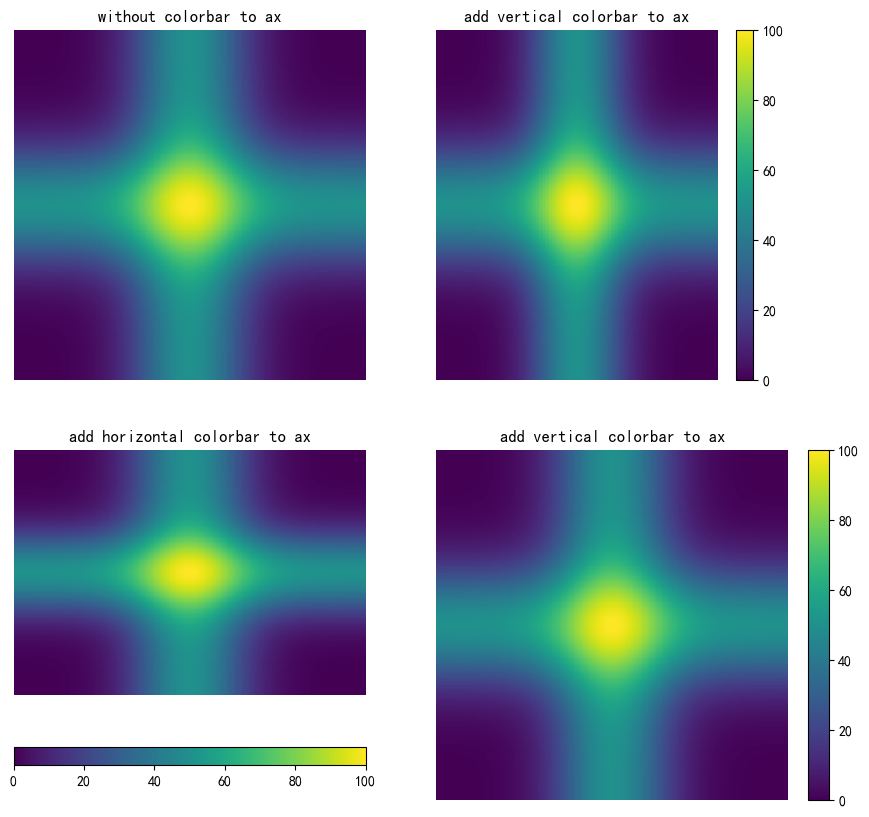

In [24]:
X, Y, Z = test_data()
cmap = mpl.cm.viridis

fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
# add dotted box indicating location of each axes
for ai in ax.flat:
    add_box(ai)
    ai.axis("off")

# no colorbar added to image
im1 = ax[0,0].pcolormesh(X,Y,Z, cmap=cmap, shading='nearest')
ax[0,0].set_title("without colorbar to ax")
# vertical colorbar added to image, but steal space from current image
im2 = ax[0,1].pcolormesh(X,Y,Z, cmap=cmap, shading="nearest")
cbar2 = fig.colorbar(im2, ax=ax[0,1],orientation="vertical")
ax[0,1].set_title("add vertical colorbar to ax")
# horizontal colorbar added to image, but steal space from current image
im3 = ax[1,0].pcolormesh(X,Y,Z, cmap=cmap, shading="nearest")
cbar3 = fig.colorbar(im3, ax=ax[1,0], cmap=cmap, orientation='horizontal')
ax[1,0].set_title("add horizontal colorbar to ax")
# vertical colorbar added to image, with new axes placing colorbar
im4 = ax[1,1].pcolormesh(X,Y,Z, cmap=cmap, shading="nearest")
cax = add_right_cax(ax[1,1],pad=0.02, width=0.02)
cbar4 = fig.colorbar(im4, cax=cax)
ax[1,1].set_title("add vertical colorbar to ax")

plt.show()

### create colorbar using axes_grid1

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import pyplot as plt
import matplotlib as mplt
import numpy as np
import pandas as pd

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right",size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

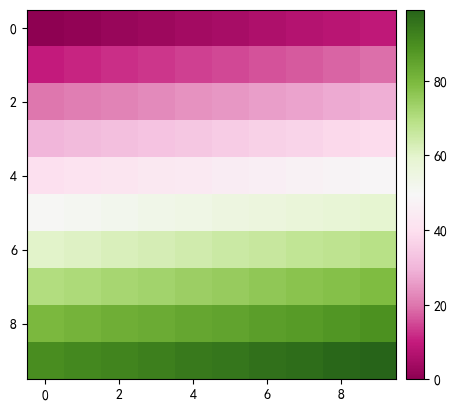

In [41]:
im = plt.imshow(np.arange(100).reshape(10,10),cmap=plt.cm.PiYG)
add_colorbar(im)
plt.show()

### others

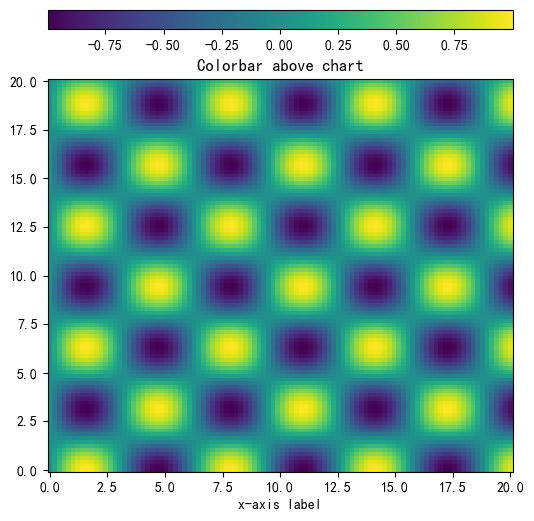

In [37]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

%matplotlib inline

# generate some data
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

# create chart
fig, ax = plt.subplots(figsize=(6,6))
im = ax.pcolormesh(X,Y,Z)
ax.set_xlabel('x-axis label')
ax.set_title('Colorbar above chart')

# add color bar below chart
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(cax)
fig.colorbar(im, cax = cax, orientation = 'horizontal')

plt.show()